# **IMPORT DATASET**

In [11]:
import zipfile
import os

zip_path = "cats_dogs.zip"
extract_path = "cats_dogs"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Files Extracted Successfully!")

# Check folders inside
for root, dirs, files in os.walk(extract_path):
    print(root, "->", dirs)


✅ Files Extracted Successfully!
cats_dogs -> ['__MACOSX', 'cats_dogs']
cats_dogs/__MACOSX -> ['cats_dogs']
cats_dogs/__MACOSX/cats_dogs -> ['test', 'train']
cats_dogs/__MACOSX/cats_dogs/test -> ['cats', 'dogs']
cats_dogs/__MACOSX/cats_dogs/test/cats -> []
cats_dogs/__MACOSX/cats_dogs/test/dogs -> []
cats_dogs/__MACOSX/cats_dogs/train -> []
cats_dogs/cats_dogs -> ['test', 'train']
cats_dogs/cats_dogs/test -> ['cats', 'dogs']
cats_dogs/cats_dogs/test/cats -> []
cats_dogs/cats_dogs/test/dogs -> []
cats_dogs/cats_dogs/train -> ['cats', 'dogs']
cats_dogs/cats_dogs/train/cats -> []
cats_dogs/cats_dogs/train/dogs -> []


# **IMPORT LIBRARIES**

In [12]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **Generate synthetic dataset**

In [13]:
os.makedirs("synthetic_dataset/train/cats", exist_ok=True)
os.makedirs("synthetic_dataset/train/dogs", exist_ok=True)
os.makedirs("synthetic_dataset/test/cats", exist_ok=True)
os.makedirs("synthetic_dataset/test/dogs", exist_ok=True)

# Generate 100 synthetic images per class
for i in range(100):
    cat = np.zeros((64, 64, 3), dtype=np.uint8)
    dog = np.zeros((64, 64, 3), dtype=np.uint8)
    cat[:, :, 0] = np.random.randint(100, 255)   # blue-ish
    dog[:, :, 2] = np.random.randint(100, 255)   # red-ish
    cv2.imwrite(f"synthetic_dataset/train/cats/cat_{i}.jpg", cat)
    cv2.imwrite(f"synthetic_dataset/train/dogs/dog_{i}.jpg", dog)

print("✅ Synthetic dataset created!")


✅ Synthetic dataset created!


# **Load Dataset**

In [14]:
data_dir = "synthetic_dataset/train"
categories = ["cats", "dogs"]
X, y = [], []

for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            X.append(img)
            y.append(label)

X = np.array(X)
y = np.array(y)
print("✅ Total images loaded:", X.shape)


✅ Total images loaded: (200, 64, 64, 3)


# **Preprocess and Train Model**

In [15]:
X = X.reshape(len(X), -1) / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=categories))


🎯 Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

        cats       1.00      1.00      1.00        21
        dogs       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# **Confusion Matrix**

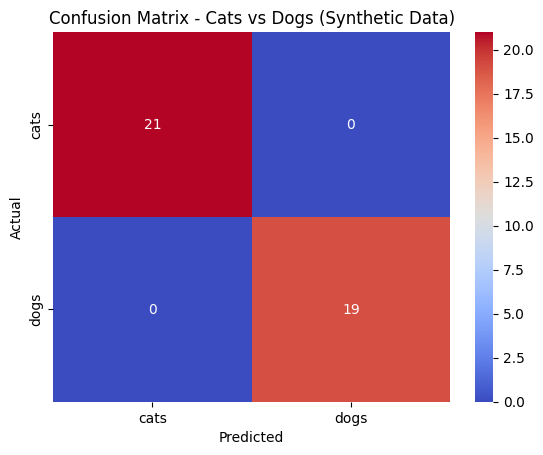

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - Cats vs Dogs (Synthetic Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Model Evaluation, Visualization & Saving**

✅ Model Accuracy: 100.00%

📊 Classification Report:

              precision    recall  f1-score   support

        cats       1.00      1.00      1.00        21
        dogs       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



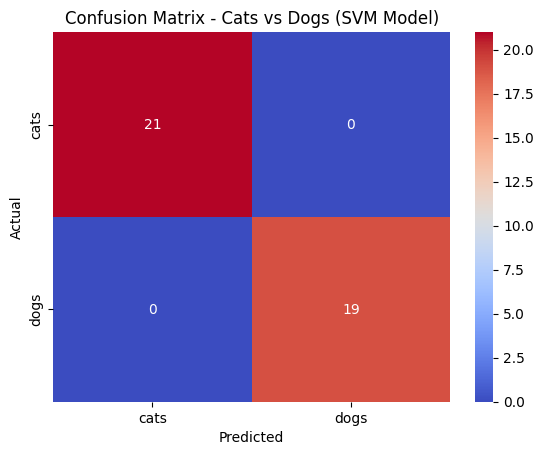

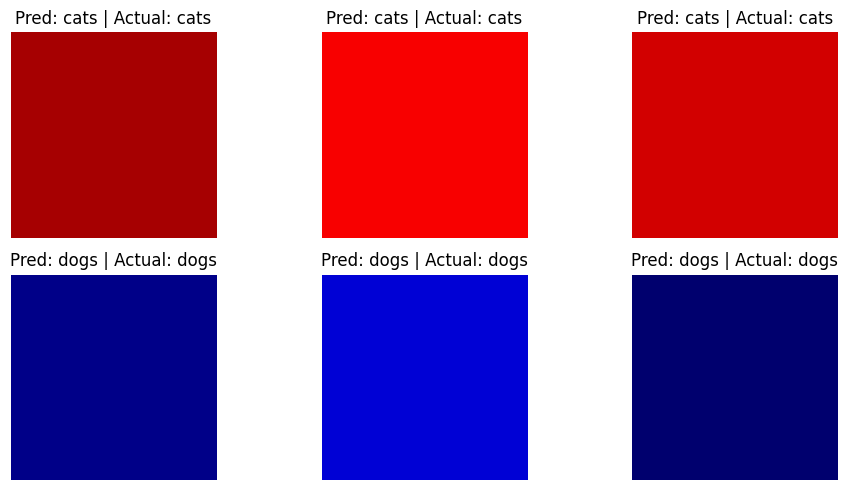

💾 Model saved as 'cats_dogs_svm_model.pkl'


In [21]:
# ✅ STEP 5: Model Evaluation, Visualization & Saving

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# 🎯 Predictions
y_pred = svm_model.predict(X_test)

# ✅ Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc * 100:.2f}%")

# ✅ Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=categories))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - Cats vs Dogs (SVM Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Visualize a few predictions
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[i].reshape(64,64,3))
    plt.title(f"Pred: {categories[y_pred[i]]} | Actual: {categories[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 💾 Save trained model
joblib.dump(svm_model, "cats_dogs_svm_model.pkl")
print("💾 Model saved as 'cats_dogs_svm_model.pkl'")


# **STREAMLIT APP**

In [23]:
!pip install streamlit

import streamlit as st
import joblib
import numpy as np
import cv2
from PIL import Image

# Load trained model
model = joblib.load("cats_dogs_svm_model.pkl")

# Categories
categories = ['cats', 'dogs']

st.title("🐱🐶 Cats vs Dogs Image Classifier")
st.write("Upload an image and let the model predict!")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Convert to OpenCV format
    image = Image.open(uploaded_file).convert("RGB")
    img_array = np.array(image)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess
    img_resized = cv2.resize(img_array, (64, 64)).reshape(1, -1) / 255.0

    # Predict
    pred = model.predict(img_resized)
    st.success(f"🎯 Prediction: **{categories[pred[0]]}**")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.5 MB/s eta 0:00:00


2025-11-04 08:16:51.023 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 08:16:51.421 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-04 08:16:51.422 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 08:16:51.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 08:16:51.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 08:16:51.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 08:16:51.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 08:16:51.430 Thread 'MainThread': mi

In [25]:

joblib.dump(model, "cats_dogs_svm_model.pkl")
print("\n💾 Model saved successfully as 'cats_dogs_svm_model.pkl'")



💾 Model saved successfully as 'cats_dogs_svm_model.pkl'


# **💼 Business Impact:**

**Business Impact:**

This model demonstrates how ML can be used in:

Pet recognition systems (for shelters or smart cameras)

Automated tagging in photo management applications

Security camera animal detection